In [19]:
!pip install pydub
!pip install --upgrade speechrecognition
!pip install librosa
!pip install matplotlib
!pip install pandas
!pip install seaborn


Requirement already up-to-date: speechrecognition in /home/tommy/anaconda3/envs/humansound/lib/python3.7/site-packages (3.8.1)
     |████████████████████████████████| 215 kB 747 kB/s eta 0:00:01


In [13]:
from csv import writer
from csv import DictWriter
def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)
def append_dict_as_row(file_name, dict_of_elem, field_names):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        dict_writer = DictWriter(write_obj, fieldnames=field_names)
        # Add dictionary as wor in the csv
        dict_writer.writerow(dict_of_elem)
'''
def main():
    print('*** Append new row to an existing csv file using csv.writer() in python ***')
    # List of strings
    row_contents = [32,'Shaun','Java','Tokyo','Morning']
    # Append a list as new line to an old csv file
    append_list_as_row('students.csv', row_contents)
    print('** Append new row to an existing csv file with less items using csv.writer()  in python **')
    # A list with missing entries
    row_contents = [33, 'Sahil', 'Morning']
    # Appending a row to csv with missing entries
    append_list_as_row('students.csv', row_contents)
    print('Append dictionary as a row to an existing csv file using DictWriter in python')
    field_names = ['Id','Name','Course','City','Session']
    row_dict = {'Id': 81,'Name': 'Sachin','Course':'Maths','City':'Mumbai','Session':'Evening'}
    # Append a dict as a row in csv file
    append_dict_as_row('students.csv', row_dict, field_names)
    print('Append a dictionary with missing entries as a new row to an existing csv file using DictWriter**')
    # If empty entries are missed then DictWriter will handle them automatically
    field_names = ['Id','Name','Course','City','Session']
    row_dict = {'Id': 33, 'Name':'Eva', 'Session':'Evening'}
    # Append a dict missing entries as a row in csv file
    append_dict_as_row('students.csv', row_dict, field_names)
if __name__ == '__main__':
    main()
'''

"\ndef main():\n    print('*** Append new row to an existing csv file using csv.writer() in python ***')\n    # List of strings\n    row_contents = [32,'Shaun','Java','Tokyo','Morning']\n    # Append a list as new line to an old csv file\n    append_list_as_row('students.csv', row_contents)\n    print('** Append new row to an existing csv file with less items using csv.writer()  in python **')\n    # A list with missing entries\n    row_contents = [33, 'Sahil', 'Morning']\n    # Appending a row to csv with missing entries\n    append_list_as_row('students.csv', row_contents)\n    print('Append dictionary as a row to an existing csv file using DictWriter in python')\n    field_names = ['Id','Name','Course','City','Session']\n    row_dict = {'Id': 81,'Name': 'Sachin','Course':'Maths','City':'Mumbai','Session':'Evening'}\n    # Append a dict as a row in csv file\n    append_dict_as_row('students.csv', row_dict, field_names)\n    print('Append a dictionary with missing entries as a new row

In [14]:
from pydub import AudioSegment
import math

# structure of file csv.
# soundaftersplit(soundid+splittimes), soundid, startsplit, endsplit, noise,simultaneously,fold, classID,classname
# noise: noise = 1 or not noise = 0
# simultaneously: simultaneously = 0 when the sound is single voice. or = 1 - many people say simultaneously
# classID 
# fold 

class SplitWavAudioMubin():
    def __init__(self, folder, file,noise,simultaneously):
        self.folder = folder
        self.file = file #Ex name.wav
        self.filepath = os.path.join(self.folder,self.file)
        self.fileID = Path(self.file).resolve().stem #Exam name
        self.audio = AudioSegment.from_wav(self.filepath)
        self.noise = noise
        self.simultaneously = simultaneously
        
    def multiple_split(self, second_per_split,countfile):
        ''' 
        Step #1 - Slicing the audio file into smaller chunks. 
        '''
        if not os.path.exists(os.path.join(DATAROOT,'audio','fold'+str(countfile))):
                os.makedirs(os.path.join(DATAROOT,'audio','fold'+str(countfile)))
        newfolder = os.path.join(DATAROOT,'audio','fold'+str(countfile))
        
        field_names = ['slice_file_name','filesID','start','end','noise','simultaneously',
                   'fold','classID','className']
                
        # Length of the audiofile in milliseconds 
        n = len(self.audio) 
        
        # Variable to count the number of sliced chunks 
        counter = 1

        # Text file to write the recognized audio 
        fh = open("recognized.txt", "w+") 

        # Interval length at which to slice the audio file. 
        # If length is 22 seconds, and interval is 5 seconds, 
        # The chunks created will be: 
        # chunk1 : 0 - 5 seconds 
        # chunk2 : 5 - 10 seconds 
        # chunk3 : 10 - 15 seconds 
        # chunk4 : 15 - 20 seconds 
        # chunk5 : 20 - 22 seconds 
        interval = second_per_split #5 * 1000

        # Length of audio to overlap.  
        # If length is 22 seconds, and interval is 4 seconds, 
        # With overlap as 3.5 seconds, 
        # The chunks created will be: 
        # chunk1 : 0 - 4 seconds 
        # chunk2 : 0.5 - 4.5 seconds 
        # chunk3 : 1.0 - 5.0 seconds 
        # chunk4 : 1.5 - 5.5 seconds 
        # chunk5 : 2.0 - 6.0 seconds 
        # chunk6 : 2.5 - 6.5 seconds 
        overlap = 3.5 * 1000

        # Initialize start and end seconds to 0 
        start = 0
        end = 0

        # Flag to keep track of end of file. 
        # When audio reaches its end, flag is set to 1 and we break 
        flag = 0

        # Iterate from 0 to end of the file, 
        # with increment = interval 
        for i in range(0, 2 * n, interval): 

            # During first iteration, 
            # start is 0, end is the interval 
            if i == 0: 
                start = 0
                end = interval 

            # All other iterations, 
            # start is the previous end - overlap 
            # end becomes end + interval 
            else: 
                start = end - overlap 
                end = start + interval  

            # When end becomes greater than the file length, 
            # end is set to the file length 
            # flag is set to 1 to indicate break. 
            if end >= n: 
                end = n 
                flag = 1

            # Storing audio file from the defined start to end 
            chunk = self.audio[start:end] 
            
            # Filename / Path to store the sliced audio 
            filename = str(self.fileID) + '-' +str(countfile) + '-' + str(counter)+'.wav'
            
            
            row_dict = {'slice_file_name':filename,'filesID':self.fileID,'start':start,'end':end,
                        'noise':self.noise,'simultaneously':self.simultaneously,
                        'fold':str(countfile),'classID':str(countfile),'className':self.fileID}
            # Append a dict missing entries as a row in csv file
            append_dict_as_row('human_sound_dataset.csv', row_dict, field_names)
            # Store the sliced audio file to the defined path 
            
            chunk.export(os.path.join(newfolder,filename), format="wav")
            # Print information about the current chunk 
            print(os.path.join(newfolder,filename))
            print("Processing chunk "+str(counter)+". Start = "
                                +str(start)+" end = "+str(end)) 

            # Increment counter for the next chunk 
            counter = counter + 1

            '''
            AUDIO_FILE = filename 
            # Initialize the recognizer 
            r = sr.Recognizer() 

            # Traverse the audio file and listen to the audio 
            with sr.AudioFile(AUDIO_FILE) as source: 
                audio_listened = r.listen(source) 

            # Try to recognize the listened audio 
            # And catch expections. 
            try:     
                rec = r.recognize_google(audio_listened) 

                # If recognized, write into the file. 
                fh.write(rec+" ") 

            # If google could not understand the audio 
            except sr.UnknownValueError: 
                print("Could not understand audio") 

            # If the results cannot be requested from Google. 
            # Probably an internet connection error. 
            except sr.RequestError as e: 
                print("Could not request results.") 

            # Check for flag. 
            # If flag is 1, end of the whole audio reached. 
            # Close the file and break. 
           
            if flag == 1: 
                fh.close() 
                break
             '''


In [15]:
import csv
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from pathlib import Path
import sys
import pandas as pd
%matplotlib inline

In [16]:
DATAROOT = Path('./humansound/') ## Set folder of your copy
def files(path):
    for f in sorted(os.listdir(path)):
            if f.startswith('.'):
                continue
            if os.path.isfile(os.path.join(path, f)):
                yield f

countfile = 0
for file in files(DATAROOT):
    print(file)
    #fileID = Path(file).resolve().stem
    noise = 0
    simultaneously = 0

    
    #folderdir = os.path.join(DATAROOT,fileID)
    #print(folderdir)
    countfile+=1
    
    field_names = ['name','id']
    row_dict = {'name':file,'id':countfile}
    # Append a dict missing entries as a row in csv file
    append_dict_as_row('nameid.csv', row_dict, field_names)
    split_wav = SplitWavAudioMubin(DATAROOT,file, noise,simultaneously)
    # Interval length at which to slice the audio file. 
    # If length is 22 seconds, and interval is 5 seconds, 
    # The chunks created will be: 
    # chunk1 : 0 - 5 seconds 
    # chunk2 : 5 - 10 seconds 
    # chunk3 : 10 - 15 seconds 
    # chunk4 : 15 - 20 seconds 
    # chunk5 : 20 - 22 seconds 
    second_per_split = 4*1000
    split_wav.multiple_split(second_per_split, countfile)

2MinsSoundAhjeongSeo.wav
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-1.wav
Processing chunk 1. Start = 0 end = 4000
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-2.wav
Processing chunk 2. Start = 500.0 end = 4500.0
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-3.wav
Processing chunk 3. Start = 1000.0 end = 5000.0
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-4.wav
Processing chunk 4. Start = 1500.0 end = 5500.0
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-5.wav
Processing chunk 5. Start = 2000.0 end = 6000.0
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-6.wav
Processing chunk 6. Start = 2500.0 end = 6500.0
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-7.wav
Processing chunk 7. Start = 3000.0 end = 7000.0
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-8.wav
Processing chunk 8. Start = 3500.0 end = 7500.0
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-9.wav
Processing chunk 9. Start = 4000.0 end = 8000.0
humansound/audio/fold1/2MinsSoundAhjeongSeo-1-10.wav
Processing chunk 10. Start = 4

humansound/audio/fold6/2MinsSoundChaeHunShin-6-73.wav
Processing chunk 73. Start = 36000.0 end = 40000.0
2MinsSoundDaeHoUm.wav
humansound/audio/fold7/2MinsSoundDaeHoUm-7-1.wav
Processing chunk 1. Start = 0 end = 4000
humansound/audio/fold7/2MinsSoundDaeHoUm-7-2.wav
Processing chunk 2. Start = 500.0 end = 4500.0
humansound/audio/fold7/2MinsSoundDaeHoUm-7-3.wav
Processing chunk 3. Start = 1000.0 end = 5000.0
humansound/audio/fold7/2MinsSoundDaeHoUm-7-4.wav
Processing chunk 4. Start = 1500.0 end = 5500.0
humansound/audio/fold7/2MinsSoundDaeHoUm-7-5.wav
Processing chunk 5. Start = 2000.0 end = 6000.0
humansound/audio/fold7/2MinsSoundDaeHoUm-7-6.wav
Processing chunk 6. Start = 2500.0 end = 6500.0
humansound/audio/fold7/2MinsSoundDaeHoUm-7-7.wav
Processing chunk 7. Start = 3000.0 end = 7000.0
humansound/audio/fold7/2MinsSoundDaeHoUm-7-8.wav
Processing chunk 8. Start = 3500.0 end = 7500.0
humansound/audio/fold7/2MinsSoundDaeHoUm-7-9.wav
Processing chunk 9. Start = 4000.0 end = 8000.0
humansou

humansound/audio/fold13/2MinsSoundHokiKim-13-22.wav
Processing chunk 22. Start = 10500.0 end = 14500.0
humansound/audio/fold13/2MinsSoundHokiKim-13-23.wav
Processing chunk 23. Start = 11000.0 end = 15000.0
humansound/audio/fold13/2MinsSoundHokiKim-13-24.wav
Processing chunk 24. Start = 11500.0 end = 15500.0
humansound/audio/fold13/2MinsSoundHokiKim-13-25.wav
Processing chunk 25. Start = 12000.0 end = 16000.0
humansound/audio/fold13/2MinsSoundHokiKim-13-26.wav
Processing chunk 26. Start = 12500.0 end = 16500.0
humansound/audio/fold13/2MinsSoundHokiKim-13-27.wav
Processing chunk 27. Start = 13000.0 end = 17000.0
humansound/audio/fold13/2MinsSoundHokiKim-13-28.wav
Processing chunk 28. Start = 13500.0 end = 17500.0
humansound/audio/fold13/2MinsSoundHokiKim-13-29.wav
Processing chunk 29. Start = 14000.0 end = 18000.0
humansound/audio/fold13/2MinsSoundHokiKim-13-30.wav
Processing chunk 30. Start = 14500.0 end = 18500.0
humansound/audio/fold13/2MinsSoundHokiKim-13-31.wav
Processing chunk 31. 

humansound/audio/fold20/2MinsSoundIlJaeKwon-20-49.wav
Processing chunk 49. Start = 24000.0 end = 28000.0
humansound/audio/fold20/2MinsSoundIlJaeKwon-20-50.wav
Processing chunk 50. Start = 24500.0 end = 28500.0
humansound/audio/fold20/2MinsSoundIlJaeKwon-20-51.wav
Processing chunk 51. Start = 25000.0 end = 29000.0
humansound/audio/fold20/2MinsSoundIlJaeKwon-20-52.wav
Processing chunk 52. Start = 25500.0 end = 29500.0
2MinsSoundInWooHwang.wav
humansound/audio/fold21/2MinsSoundInWooHwang-21-1.wav
Processing chunk 1. Start = 0 end = 4000
humansound/audio/fold21/2MinsSoundInWooHwang-21-2.wav
Processing chunk 2. Start = 500.0 end = 4500.0
humansound/audio/fold21/2MinsSoundInWooHwang-21-3.wav
Processing chunk 3. Start = 1000.0 end = 5000.0
humansound/audio/fold21/2MinsSoundInWooHwang-21-4.wav
Processing chunk 4. Start = 1500.0 end = 5500.0
humansound/audio/fold21/2MinsSoundInWooHwang-21-5.wav
Processing chunk 5. Start = 2000.0 end = 6000.0
humansound/audio/fold21/2MinsSoundInWooHwang-21-6.wav

humansound/audio/fold28/2MinsSoundJaewoongShim-28-21.wav
Processing chunk 21. Start = 10000.0 end = 14000.0
humansound/audio/fold28/2MinsSoundJaewoongShim-28-22.wav
Processing chunk 22. Start = 10500.0 end = 14500.0
humansound/audio/fold28/2MinsSoundJaewoongShim-28-23.wav
Processing chunk 23. Start = 11000.0 end = 15000.0
humansound/audio/fold28/2MinsSoundJaewoongShim-28-24.wav
Processing chunk 24. Start = 11500.0 end = 15500.0
humansound/audio/fold28/2MinsSoundJaewoongShim-28-25.wav
Processing chunk 25. Start = 12000.0 end = 16000.0
humansound/audio/fold28/2MinsSoundJaewoongShim-28-26.wav
Processing chunk 26. Start = 12500.0 end = 16500.0
humansound/audio/fold28/2MinsSoundJaewoongShim-28-27.wav
Processing chunk 27. Start = 13000.0 end = 17000.0
humansound/audio/fold28/2MinsSoundJaewoongShim-28-28.wav
Processing chunk 28. Start = 13500.0 end = 17500.0
humansound/audio/fold28/2MinsSoundJaewoongShim-28-29.wav
Processing chunk 29. Start = 14000.0 end = 18000.0
humansound/audio/fold28/2Min

humansound/audio/fold35/2MinsSoundJungHunOh-35-50.wav
Processing chunk 50. Start = 24500.0 end = 28500.0
humansound/audio/fold35/2MinsSoundJungHunOh-35-51.wav
Processing chunk 51. Start = 25000.0 end = 29000.0
humansound/audio/fold35/2MinsSoundJungHunOh-35-52.wav
Processing chunk 52. Start = 25500.0 end = 29500.0
humansound/audio/fold35/2MinsSoundJungHunOh-35-53.wav
Processing chunk 53. Start = 26000.0 end = 30000.0
humansound/audio/fold35/2MinsSoundJungHunOh-35-54.wav
Processing chunk 54. Start = 26500.0 end = 30500.0
humansound/audio/fold35/2MinsSoundJungHunOh-35-55.wav
Processing chunk 55. Start = 27000.0 end = 31000.0
humansound/audio/fold35/2MinsSoundJungHunOh-35-56.wav
Processing chunk 56. Start = 27500.0 end = 31500.0
humansound/audio/fold35/2MinsSoundJungHunOh-35-57.wav
Processing chunk 57. Start = 28000.0 end = 32000.0
humansound/audio/fold35/2MinsSoundJungHunOh-35-58.wav
Processing chunk 58. Start = 28500.0 end = 32500.0
2MinsSoundKibeomKim.wav
humansound/audio/fold36/2MinsSo

humansound/audio/fold43/2MinsSoundNguyenAnhTung-43-49.wav
Processing chunk 49. Start = 24000.0 end = 28000.0
humansound/audio/fold43/2MinsSoundNguyenAnhTung-43-50.wav
Processing chunk 50. Start = 24500.0 end = 28500.0
humansound/audio/fold43/2MinsSoundNguyenAnhTung-43-51.wav
Processing chunk 51. Start = 25000.0 end = 29000.0
humansound/audio/fold43/2MinsSoundNguyenAnhTung-43-52.wav
Processing chunk 52. Start = 25500.0 end = 29500.0
humansound/audio/fold43/2MinsSoundNguyenAnhTung-43-53.wav
Processing chunk 53. Start = 26000.0 end = 30000.0
humansound/audio/fold43/2MinsSoundNguyenAnhTung-43-54.wav
Processing chunk 54. Start = 26500.0 end = 30500.0
humansound/audio/fold43/2MinsSoundNguyenAnhTung-43-55.wav
Processing chunk 55. Start = 27000.0 end = 31000.0
humansound/audio/fold43/2MinsSoundNguyenAnhTung-43-56.wav
Processing chunk 56. Start = 27500.0 end = 31500.0
humansound/audio/fold43/2MinsSoundNguyenAnhTung-43-57.wav
Processing chunk 57. Start = 28000.0 end = 32000.0
humansound/audio/fo

humansound/audio/fold50/2MinsSoundSungeunKim-50-55.wav
Processing chunk 55. Start = 27000.0 end = 31000.0
humansound/audio/fold50/2MinsSoundSungeunKim-50-56.wav
Processing chunk 56. Start = 27500.0 end = 31500.0
humansound/audio/fold50/2MinsSoundSungeunKim-50-57.wav
Processing chunk 57. Start = 28000.0 end = 32000.0
humansound/audio/fold50/2MinsSoundSungeunKim-50-58.wav
Processing chunk 58. Start = 28500.0 end = 32500.0
humansound/audio/fold50/2MinsSoundSungeunKim-50-59.wav
Processing chunk 59. Start = 29000.0 end = 33000.0
humansound/audio/fold50/2MinsSoundSungeunKim-50-60.wav
Processing chunk 60. Start = 29500.0 end = 33500.0
humansound/audio/fold50/2MinsSoundSungeunKim-50-61.wav
Processing chunk 61. Start = 30000.0 end = 34000.0
humansound/audio/fold50/2MinsSoundSungeunKim-50-62.wav
Processing chunk 62. Start = 30500.0 end = 34500.0
humansound/audio/fold50/2MinsSoundSungeunKim-50-63.wav
Processing chunk 63. Start = 31000.0 end = 35000.0
2MinsSoundSunohKim.wav
humansound/audio/fold51

humansound/audio/fold59/2MinsSoundYeonGoonKim-59-7.wav
Processing chunk 7. Start = 3000.0 end = 7000.0
humansound/audio/fold59/2MinsSoundYeonGoonKim-59-8.wav
Processing chunk 8. Start = 3500.0 end = 7500.0
humansound/audio/fold59/2MinsSoundYeonGoonKim-59-9.wav
Processing chunk 9. Start = 4000.0 end = 8000.0
humansound/audio/fold59/2MinsSoundYeonGoonKim-59-10.wav
Processing chunk 10. Start = 4500.0 end = 8500.0
humansound/audio/fold59/2MinsSoundYeonGoonKim-59-11.wav
Processing chunk 11. Start = 5000.0 end = 9000.0
humansound/audio/fold59/2MinsSoundYeonGoonKim-59-12.wav
Processing chunk 12. Start = 5500.0 end = 9500.0
humansound/audio/fold59/2MinsSoundYeonGoonKim-59-13.wav
Processing chunk 13. Start = 6000.0 end = 10000.0
humansound/audio/fold59/2MinsSoundYeonGoonKim-59-14.wav
Processing chunk 14. Start = 6500.0 end = 10500.0
humansound/audio/fold59/2MinsSoundYeonGoonKim-59-15.wav
Processing chunk 15. Start = 7000.0 end = 11000.0
humansound/audio/fold59/2MinsSoundYeonGoonKim-59-16.wav
Pr

humansound/audio/fold66/2MinsSound김지환-66-35.wav
Processing chunk 35. Start = 17000.0 end = 21000.0
humansound/audio/fold66/2MinsSound김지환-66-36.wav
Processing chunk 36. Start = 17500.0 end = 21500.0
humansound/audio/fold66/2MinsSound김지환-66-37.wav
Processing chunk 37. Start = 18000.0 end = 22000.0
humansound/audio/fold66/2MinsSound김지환-66-38.wav
Processing chunk 38. Start = 18500.0 end = 22500.0
humansound/audio/fold66/2MinsSound김지환-66-39.wav
Processing chunk 39. Start = 19000.0 end = 23000.0
humansound/audio/fold66/2MinsSound김지환-66-40.wav
Processing chunk 40. Start = 19500.0 end = 23500.0
humansound/audio/fold66/2MinsSound김지환-66-41.wav
Processing chunk 41. Start = 20000.0 end = 24000.0
humansound/audio/fold66/2MinsSound김지환-66-42.wav
Processing chunk 42. Start = 20500.0 end = 24500.0
humansound/audio/fold66/2MinsSound김지환-66-43.wav
Processing chunk 43. Start = 21000.0 end = 25000.0
humansound/audio/fold66/2MinsSound김지환-66-44.wav
Processing chunk 44. Start = 21500.0 end = 25500.0
humansound

In [24]:
import seaborn as sns
metadata_path = os.path.join(DATAROOT, 'metadata/human_sound_dataset.csv')
df = pd.read_csv(metadata_path)
df.head()

,slice_file_name,filesID,start,end,noise,simultaneously,fold,classID,className
0,2MinsSoundAhjeongSeo-1-1.wav,2MinsSoundAhjeongSeo,0.0,4000.0,0,0,1,1,2MinsSoundAhjeongSeo
1,2MinsSoundAhjeongSeo-1-2.wav,2MinsSoundAhjeongSeo,500.0,4500.0,0,0,1,1,2MinsSoundAhjeongSeo
2,2MinsSoundAhjeongSeo-1-3.wav,2MinsSoundAhjeongSeo,1000.0,5000.0,0,0,1,1,2MinsSoundAhjeongSeo
3,2MinsSoundAhjeongSeo-1-4.wav,2MinsSoundAhjeongSeo,1500.0,5500.0,0,0,1,1,2MinsSoundAhjeongSeo
4,2MinsSoundAhjeongSeo-1-5.wav,2MinsSoundAhjeongSeo,2000.0,6000.0,0,0,1,1,2MinsSoundAhjeongSeo


In [42]:
df.count()

slice_file_name    4100
filesID            4100
start              4100
end                4100
noise              4100
simultaneously     4100
fold               4100
classID            4100
className          4100
dtype: int64

/home/tommy/anaconda3/envs/humansound/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tommy/anaconda3/envs/humansound/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


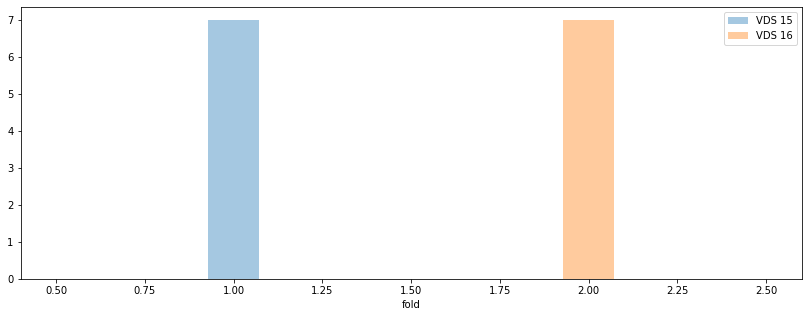

In [45]:
df2 = df.copy()
selected_labels = ['1', '2','3', '4','5','6','7', '8','9', '10','11','12','13','14','15']
df_label=df2[df2['classID'].isin(selected_labels)]

plt.figure(figsize=(14, 5))
sns.distplot(df_label[df_label['filesID'] =='2MinsSoundAhjeongSeo']['fold'], label= "VDS 15")
sns.distplot(df_label[df_label['filesID'] =='2MinsSoundBoeunKim']['fold'], label= "VDS 16")
plt.legend();

<AxesSubplot:xlabel='classID'>

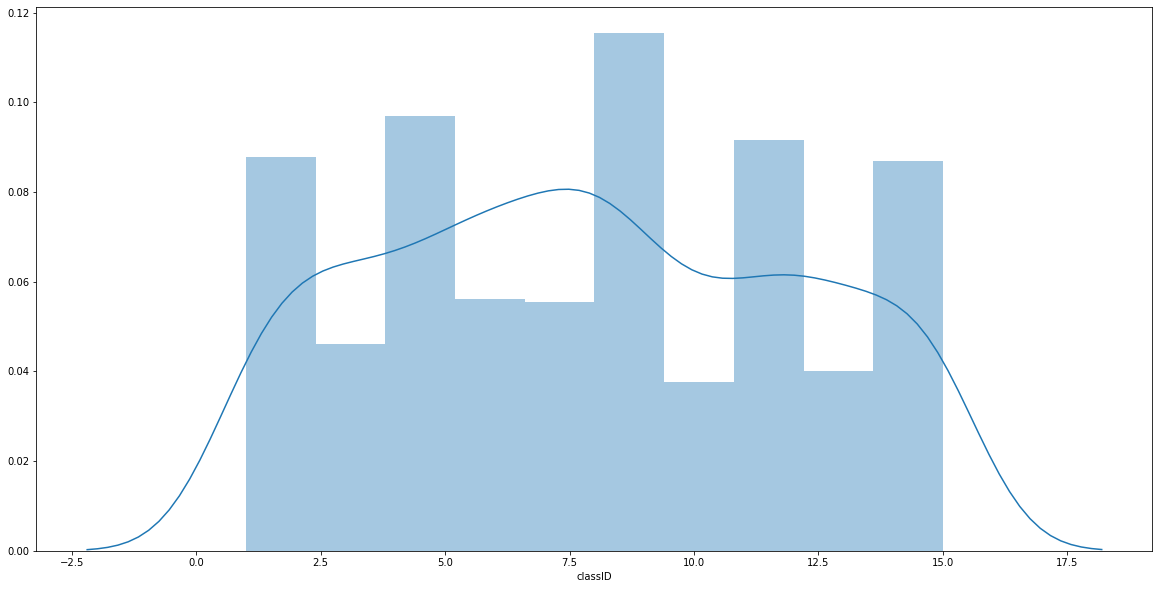

In [48]:
plt.figure(figsize=(20, 10))
sns.distplot(df_label['classID'])

<AxesSubplot:xlabel='fold', ylabel='count'>

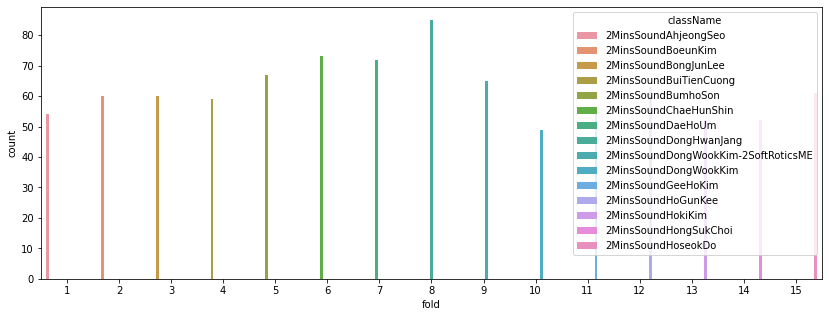

In [49]:
plt.figure(figsize=(14, 5))
sns.countplot(df_label['fold'], hue = df_label['className'])

# remove silence at the beginning and at the end of wave files

In [54]:
from pydub import AudioSegment

def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms

    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

sound = AudioSegment.from_file("/path/to/file.wav", format="wav")

start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim]

'''
from pydub.silence import detect_nonsilent

def remove_sil(path_in, path_out, format="wav"):
    sound = AudioSegment.from_file(path_in, format=format)
    non_sil_times = detect_nonsilent(sound, min_silence_len=50, silence_thresh=sound.dBFS * 1.5)
    if len(non_sil_times) > 0:
        non_sil_times_concat = [non_sil_times[0]]
        if len(non_sil_times) > 1:
            for t in non_sil_times[1:]:
                if t[0] - non_sil_times_concat[-1][-1] < 200:
                    non_sil_times_concat[-1][-1] = t[1]
                else:
                    non_sil_times_concat.append(t)
        non_sil_times = [t for t in non_sil_times_concat if t[1] - t[0] > 350]
        sound[non_sil_times[0][0]: non_sil_times[-1][1]].export(path_out)
'''

lam.wav1.wav
humansound/lam/lamsound
lam.wav10.wav
humansound/lam/lamsound
lam.wav11.wav
humansound/lam/lamsound
lam.wav12.wav
humansound/lam/lamsound
lam.wav13.wav
humansound/lam/lamsound
lam.wav14.wav
humansound/lam/lamsound
lam.wav15.wav
humansound/lam/lamsound
lam.wav16.wav
humansound/lam/lamsound
lam.wav17.wav
humansound/lam/lamsound
lam.wav18.wav
humansound/lam/lamsound
lam.wav19.wav
humansound/lam/lamsound
lam.wav2.wav
humansound/lam/lamsound
lam.wav20.wav
humansound/lam/lamsound
lam.wav21.wav
humansound/lam/lamsound
lam.wav22.wav
humansound/lam/lamsound
lam.wav23.wav
humansound/lam/lamsound
lam.wav24.wav
humansound/lam/lamsound
lam.wav25.wav
humansound/lam/lamsound
lam.wav26.wav
humansound/lam/lamsound
lam.wav27.wav
humansound/lam/lamsound
lam.wav28.wav
humansound/lam/lamsound
lam.wav29.wav
humansound/lam/lamsound
lam.wav3.wav
humansound/lam/lamsound
lam.wav30.wav
humansound/lam/lamsound
lam.wav31.wav
humansound/lam/lamsound
lam.wav32.wav
humansound/lam/lamsound
lam.wav33.wav
h

'\ndef set_lable_data(base_dir):\n    data = []\n    labels = []\n    class_to_idx = 0\n    \n    for f in sorted(os.listdir(base_dir)):\n        if f.startswith(\'.\'):\n            continue\n        #print(f)\n        \n        classes[class_to_idx]=f\n        class_to_idx += 1\n        print(classes)\n        if os.path.isdir(base_dir+f):\n            print(f"{f} is a target class")\n            imagePaths = list(paths.list_images(base_dir+f))         \n            for imagePath in imagePaths:\n                print(f"{imagePath}")\n                image = cv2.imread(imagePath)\n                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n                image = cv2.resize(image, (128, 128))\n                #print(image)\n                #print(f)\n                data.append(image)\n                labels.append(f)\n    return data,labels,classes\n'